In [1]:
import scipy.io
import h5py
import numpy as np
import pandas as pd

import seaborn as sns
from scipy.stats import hypergeom
import matplotlib.pyplot as plt

/Users/akmorrow/venvs/epitome-venv/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# the 919 labels
label_str = '8988T|DNase|None,AoSMC|DNase|None,Chorion|DNase|None,CLL|DNase|None,Fibrobl|DNase|None,FibroP|DNase|None,Gliobla|DNase|None,GM12891|DNase|None,GM12892|DNase|None,GM18507|DNase|None,GM19238|DNase|None,GM19239|DNase|None,GM19240|DNase|None,H9ES|DNase|None,HeLa-S3|DNase|IFNa4h,Hepatocytes|DNase|None,HPDE6-E6E7|DNase|None,HSMM_emb|DNase|None,HTR8svn|DNase|None,Huh-7.5|DNase|None,Huh-7|DNase|None,iPS|DNase|None,Ishikawa|DNase|Estradiol_100nM_1hr,Ishikawa|DNase|4OHTAM_20nM_72hr,LNCaP|DNase|androgen,MCF-7|DNase|Hypoxia_LacAcid,Medullo|DNase|None,Melano|DNase|None,Myometr|DNase|None,Osteobl|DNase|None,PanIsletD|DNase|None,PanIslets|DNase|None,pHTE|DNase|None,ProgFib|DNase|None,RWPE1|DNase|None,Stellate|DNase|None,T-47D|DNase|None,Adult_CD4_Th0|DNase|None,Urothelia|DNase|None,Urothelia|DNase|UT189,AG04449|DNase|None,AG04450|DNase|None,AG09309|DNase|None,AG09319|DNase|None,AG10803|DNase|None,AoAF|DNase|None,BE2_C|DNase|None,BJ|DNase|None,Caco-2|DNase|None,CD20+|DNase|None,CD34+_Mobilized|DNase|None,CMK|DNase|None,A549|DNase|None,GM12878|DNase|None,H1-hESC|DNase|None,HeLa-S3|DNase|None,HepG2|DNase|None,HMEC|DNase|None,HSMMtube|DNase|None,HSMM|DNase|None,HUVEC|DNase|None,K562|DNase|None,LNCaP|DNase|None,MCF-7|DNase|None,NHEK|DNase|None,Th1|DNase|None,GM06990|DNase|None,GM12864|DNase|None,GM12865|DNase|None,H7-hESC|DNase|None,HAc|DNase|None,HAEpiC|DNase|None,HA-h|DNase|None,HA-sp|DNase|None,HBMEC|DNase|None,HCFaa|DNase|None,HCF|DNase|None,HCM|DNase|None,HConF|DNase|None,HCPEpiC|DNase|None,HCT-116|DNase|None,HEEpiC|DNase|None,HFF-Myc|DNase|None,HFF|DNase|None,HGF|DNase|None,HIPEpiC|DNase|None,HL-60|DNase|None,HMF|DNase|None,HMVEC-dAd|DNase|None,HMVEC-dBl-Ad|DNase|None,HMVEC-dBl-Neo|DNase|None,HMVEC-dLy-Ad|DNase|None,HMVEC-dLy-Neo|DNase|None,HMVEC-dNeo|DNase|None,HMVEC-LBl|DNase|None,HMVEC-LLy|DNase|None,HNPCEpiC|DNase|None,HPAEC|DNase|None,HPAF|DNase|None,HPdLF|DNase|None,HPF|DNase|None,HRCEpiC|DNase|None,HRE|DNase|None,HRGEC|DNase|None,HRPEpiC|DNase|None,HVMF|DNase|None,Jurkat|DNase|None,Monocytes-CD14+_RO01746|DNase|None,NB4|DNase|None,NH-A|DNase|None,NHDF-Ad|DNase|None,NHDF-neo|DNase|None,NHLF|DNase|None,NT2-D1|DNase|None,PANC-1|DNase|None,PrEC|DNase|None,RPTEC|DNase|None,SAEC|DNase|None,SKMC|DNase|None,SK-N-MC|DNase|None,SK-N-SH_RA|DNase|None,Th2|DNase|None,WERI-Rb-1|DNase|None,WI-38|DNase|4OHTAM_20nM_72hr,WI-38|DNase|None,Dnd41|CTCF|None,Dnd41|EZH2|None,GM12878|CTCF|None,GM12878|EZH2|None,H1-hESC|CHD1|None,H1-hESC|CTCF|None,H1-hESC|EZH2|None,H1-hESC|JARID1A|None,H1-hESC|RBBP5|None,HeLa-S3|CTCF|None,HeLa-S3|EZH2|None,HeLa-S3|Pol2(b)|None,HepG2|CTCF|None,HepG2|EZH2|None,HMEC|CTCF|None,HMEC|EZH2|None,HSMM|CTCF|None,HSMM|EZH2|None,HSMMtube|CTCF|None,HSMMtube|EZH2|None,HUVEC|CTCF|None,HUVEC|EZH2|None,HUVEC|Pol2(b)|None,K562|CHD1|None,K562|CTCF|None,K562|EZH2|None,K562|HDAC1|None,K562|HDAC2|None,K562|HDAC6|None,K562|p300|None,K562|PHF8|None,K562|PLU1|None,K562|Pol2(b)|None,K562|RBBP5|None,K562|SAP30|None,NH-A|CTCF|None,NH-A|EZH2|None,NHDF-Ad|CTCF|None,NHDF-Ad|EZH2|None,NHEK|CTCF|None,NHEK|EZH2|None,NHEK|Pol2(b)|None,NHLF|CTCF|None,NHLF|EZH2|None,Osteobl|CTCF|None,A549|ATF3|EtOH_0.02pct,A549|BCL3|EtOH_0.02pct,A549|CREB1|DEX_100nM,A549|CTCF|DEX_100nM,A549|CTCF|EtOH_0.02pct,A549|ELF1|EtOH_0.02pct,A549|ETS1|EtOH_0.02pct,A549|FOSL2|EtOH_0.02pct,A549|FOXA1|DEX_100nM,A549|GABP|EtOH_0.02pct,A549|GR|DEX_500pM,A549|GR|DEX_50nM,A549|GR|DEX_5nM,A549|GR|DEX_100nM,A549|NRSF|EtOH_0.02pct,A549|p300|EtOH_0.02pct,A549|Pol2|DEX_100nM,A549|Pol2|EtOH_0.02pct,A549|Sin3Ak-20|EtOH_0.02pct,A549|SIX5|EtOH_0.02pct,A549|TAF1|EtOH_0.02pct,A549|TCF12|EtOH_0.02pct,A549|USF-1|DEX_100nM,A549|USF-1|EtOH_0.02pct,A549|USF-1|EtOH_0.02pct,A549|YY1|EtOH_0.02pct,A549|ZBTB33|EtOH_0.02pct,ECC-1|CTCF|DMSO_0.02pct,ECC-1|ERalpha|BPA_100nM,ECC-1|ERalpha|Estradiol_10nM,ECC-1|ERalpha|Genistein_100nM,ECC-1|FOXA1|DMSO_0.02pct,ECC-1|GR|DEX_100nM,ECC-1|Pol2|DMSO_0.02pct,GM12878|ATF2|None,GM12878|ATF3|None,GM12878|BATF|None,GM12878|BCL11A|None,GM12878|BCL3|None,GM12878|BCLAF1|None,GM12878|CEBPB|None,GM12878|EBF1|None,GM12878|Egr-1|None,GM12878|ELF1|None,GM12878|ETS1|None,GM12878|FOXM1|None,GM12878|GABP|None,GM12878|IRF4|None,GM12878|MEF2A|None,GM12878|MEF2C|None,GM12878|MTA3|None,GM12878|NFATC1|None,GM12878|NFIC|None,GM12878|NRSF|None,GM12878|p300|None,GM12878|PAX5-C20|None,GM12878|PAX5-N19|None,GM12878|Pbx3|None,GM12878|PML|None,GM12878|Pol2-4H8|None,GM12878|Pol2|None,GM12878|POU2F2|None,GM12878|PU.1|None,GM12878|Rad21|None,GM12878|RUNX3|None,GM12878|RXRA|None,GM12878|SIX5|None,GM12878|SP1|None,GM12878|SRF|None,GM12878|STAT5A|None,GM12878|TAF1|None,GM12878|TCF12|None,GM12878|TCF3|None,GM12878|USF-1|None,GM12878|YY1|None,GM12878|ZBTB33|None,GM12878|ZEB1|None,GM12891|PAX5-C20|None,GM12891|Pol2-4H8|None,GM12891|Pol2|None,GM12891|POU2F2|None,GM12891|PU.1|None,GM12891|TAF1|None,GM12891|YY1|None,GM12892|PAX5-C20|None,GM12892|Pol2-4H8|None,GM12892|Pol2|None,GM12892|TAF1|None,GM12892|YY1|None,H1-hESC|ATF2|None,H1-hESC|ATF3|None,H1-hESC|BCL11A|None,H1-hESC|CTCF|None,H1-hESC|Egr-1|None,H1-hESC|FOSL1|None,H1-hESC|GABP|None,H1-hESC|HDAC2|None,H1-hESC|JunD|None,H1-hESC|NANOG|None,H1-hESC|NRSF|None,H1-hESC|p300|None,H1-hESC|Pol2-4H8|None,H1-hESC|Pol2|None,H1-hESC|POU5F1|None,H1-hESC|Rad21|None,H1-hESC|RXRA|None,H1-hESC|Sin3Ak-20|None,H1-hESC|SIX5|None,H1-hESC|SP1|None,H1-hESC|SP2|None,H1-hESC|SP4|None,H1-hESC|SRF|None,H1-hESC|TAF1|None,H1-hESC|TAF7|None,H1-hESC|TCF12|None,H1-hESC|TEAD4|None,H1-hESC|USF-1|None,H1-hESC|YY1|None,HCT-116|Pol2-4H8|None,HCT-116|YY1|None,HCT-116|ZBTB33|None,HeLa-S3|GABP|None,HeLa-S3|NRSF|None,HeLa-S3|Pol2|None,HeLa-S3|TAF1|None,HepG2|ATF3|None,HepG2|BHLHE40|None,HepG2|CEBPB|None,HepG2|CEBPD|None,HepG2|CTCF|None,HepG2|ELF1|None,HepG2|FOSL2|None,HepG2|FOXA1|None,HepG2|FOXA1|None,HepG2|FOXA2|None,HepG2|GABP|None,HepG2|HDAC2|None,HepG2|HNF4A|None,HepG2|HNF4G|None,HepG2|JunD|None,HepG2|MBD4|None,HepG2|MYBL2|None,HepG2|NFIC|None,HepG2|NRSF|None,HepG2|NRSF|None,HepG2|p300|None,HepG2|Pol2-4H8|None,HepG2|Pol2|None,HepG2|Rad21|None,HepG2|RXRA|None,HepG2|Sin3Ak-20|None,HepG2|SP1|None,HepG2|SP2|None,HepG2|SRF|None,HepG2|TAF1|None,HepG2|TCF12|None,HepG2|TEAD4|None,HepG2|USF-1|None,HepG2|YY1|None,HepG2|ZBTB33|None,HepG2|ZBTB7A|None,HUVEC|Pol2-4H8|None,HUVEC|Pol2|None,K562|ATF3|None,K562|BCL3|None,K562|BCLAF1|None,K562|CBX3|None,K562|CEBPB|None,K562|CTCF|None,K562|CTCFL|None,K562|E2F6|None,K562|Egr-1|None,K562|ELF1|None,K562|ETS1|None,K562|FOSL1|None,K562|GABP|None,K562|GATA2|None,K562|HDAC2|None,K562|Max|None,K562|MEF2A|None,K562|NR2F2|None,K562|NRSF|None,K562|PML|None,K562|Pol2-4H8|None,K562|Pol2|None,K562|PU.1|None,K562|Rad21|None,K562|Sin3Ak-20|None,K562|SIX5|None,K562|SP1|None,K562|SP2|None,K562|SRF|None,K562|STAT5A|None,K562|TAF1|None,K562|TAF7|None,K562|TEAD4|None,K562|THAP1|None,K562|TRIM28|None,K562|USF-1|None,K562|YY1|None,K562|YY1|None,K562|ZBTB33|None,K562|ZBTB7A|None,PANC-1|NRSF|None,PANC-1|Pol2-4H8|None,PANC-1|Sin3Ak-20|None,PFSK-1|FOXP2|None,PFSK-1|NRSF|None,PFSK-1|Sin3Ak-20|None,PFSK-1|TAF1|None,SK-N-MC|FOXP2|None,SK-N-MC|Pol2-4H8|None,SK-N-SH|NRSF|None,SK-N-SH|NRSF|None,SK-N-SH|Pol2-4H8|None,SK-N-SH_RA|CTCF|None,SK-N-SH_RA|p300|None,SK-N-SH_RA|Rad21|None,SK-N-SH_RA|USF1|None,SK-N-SH_RA|YY1|None,SK-N-SH|Sin3Ak-20|None,SK-N-SH|TAF1|None,T-47D|CTCF|DMSO_0.02pct,T-47D|ERalpha|BPA_100nM,T-47D|ERalpha|Genistein_100nM,T-47D|ERalpha|Estradiol_10nM,T-47D|FOXA1|DMSO_0.02pct,T-47D|GATA3|DMSO_0.02pct,T-47D|p300|DMSO_0.02pct,U87|NRSF|None,U87|Pol2-4H8|None,A549|BHLHE40|None,A549|CEBPB|None,A549|Max|None,A549|Pol2(phosphoS2)|None,A549|Rad21|None,GM08714|ZNF274|None,GM10847|NFKB|TNFa,GM10847|Pol2|None,GM12878|BHLHE40|None,GM12878|BRCA1|None,GM12878|c-Fos|None,GM12878|CHD1|None,GM12878|CHD2|None,GM12878|COREST|None,GM12878|CTCF|None,GM12878|E2F4|None,GM12878|EBF1|None,GM12878|ELK1|None,GM12878|IKZF1|None,GM12878|JunD|None,GM12878|Max|None,GM12878|MAZ|None,GM12878|Mxi1|None,GM12878|NF-E2|None,GM12878|NFKB|TNFa,GM12878|NF-YA|None,GM12878|NF-YB|None,GM12878|Nrf1|None,GM12878|p300|None,GM12878|p300|None,GM12878|Pol2|None,GM12878|Pol2(phosphoS2)|None,GM12878|Pol2|None,GM12878|Pol3|None,GM12878|Rad21|None,GM12878|RFX5|None,GM12878|SIN3A|None,GM12878|SMC3|None,GM12878|STAT1|None,GM12878|STAT3|None,GM12878|TBLR1|None,GM12878|TBP|None,GM12878|TR4|None,GM12878|USF2|None,GM12878|WHIP|None,GM12878|YY1|None,GM12878|Znf143|None,GM12878|ZNF274|None,GM12878|ZZZ3|None,GM12891|NFKB|TNFa,GM12891|Pol2|None,GM12892|NFKB|TNFa,GM12892|Pol2|None,GM15510|NFKB|TNFa,GM15510|Pol2|None,GM18505|NFKB|TNFa,GM18505|Pol2|None,GM18526|NFKB|TNFa,GM18526|Pol2|None,GM18951|NFKB|TNFa,GM18951|Pol2|None,GM19099|NFKB|TNFa,GM19099|Pol2|None,GM19193|NFKB|TNFa,GM19193|Pol2|None,H1-hESC|Bach1|None,H1-hESC|BRCA1|None,H1-hESC|CEBPB|None,H1-hESC|CHD1|None,H1-hESC|CHD2|None,H1-hESC|c-Jun|None,H1-hESC|c-Myc|None,H1-hESC|CtBP2|None,H1-hESC|GTF2F1|None,H1-hESC|JunD|None,H1-hESC|MafK|None,H1-hESC|Max|None,H1-hESC|Mxi1|None,H1-hESC|Nrf1|None,H1-hESC|Rad21|None,H1-hESC|RFX5|None,H1-hESC|SIN3A|None,H1-hESC|SUZ12|None,H1-hESC|TBP|None,H1-hESC|USF2|None,H1-hESC|Znf143|None,HCT-116|Pol2|None,HCT-116|TCF7L2|None,HEK293|ELK4|None,HEK293|KAP1|None,HEK293|Pol2|None,HEK293|TCF7L2|None,HEK293-T-REx|ZNF263|None,HeLa-S3|AP-2alpha|None,HeLa-S3|AP-2gamma|None,HeLa-S3|BAF155|None,HeLa-S3|BAF170|None,HeLa-S3|BDP1|None,HeLa-S3|BRCA1|None,HeLa-S3|BRF1|None,HeLa-S3|BRF2|None,HeLa-S3|Brg1|None,HeLa-S3|CEBPB|None,HeLa-S3|c-Fos|None,HeLa-S3|CHD2|None,HeLa-S3|c-Jun|None,HeLa-S3|c-Myc|None,HeLa-S3|COREST|None,HeLa-S3|E2F1|None,HeLa-S3|E2F4|None,HeLa-S3|E2F6|None,HeLa-S3|ELK1|None,HeLa-S3|ELK4|None,HeLa-S3|GTF2F1|None,HeLa-S3|HA-E2F1|None,HeLa-S3|Ini1|None,HeLa-S3|IRF3|None,HeLa-S3|JunD|None,HeLa-S3|MafK|None,HeLa-S3|Max|None,HeLa-S3|MAZ|None,HeLa-S3|Mxi1|None,HeLa-S3|NF-YA|None,HeLa-S3|NF-YB|None,HeLa-S3|Nrf1|None,HeLa-S3|p300|None,HeLa-S3|Pol2(phosphoS2)|None,HeLa-S3|Pol2|None,HeLa-S3|PRDM1|None,HeLa-S3|Rad21|None,HeLa-S3|RFX5|None,HeLa-S3|RPC155|None,HeLa-S3|SMC3|None,HeLa-S3|SPT20|None,HeLa-S3|STAT1|IFNg30,HeLa-S3|STAT3|None,HeLa-S3|TBP|None,HeLa-S3|TCF7L2|None,HeLa-S3|TCF7L2|None,HeLa-S3|TFIIIC-110|None,HeLa-S3|TR4|None,HeLa-S3|USF2|None,HeLa-S3|ZKSCAN1|None,HeLa-S3|Znf143|None,HeLa-S3|ZNF274|None,HeLa-S3|ZZZ3|None,HepG2|ARID3A|None,HepG2|BHLHE40|None,HepG2|BRCA1|None,HepG2|CEBPB|forskolin,HepG2|CEBPB|None,HepG2|CHD2|None,HepG2|c-Jun|None,HepG2|COREST|None,HepG2|ERRA|forskolin,HepG2|GRp20|forskolin,HepG2|HNF4A|forskolin,HepG2|HSF1|forskolin,HepG2|IRF3|None,HepG2|JunD|None,HepG2|MafF|None,HepG2|MafK|None,HepG2|MafK|None,HepG2|Max|None,HepG2|MAZ|None,HepG2|Mxi1|None,HepG2|Nrf1|None,HepG2|p300|None,HepG2|PGC1A|forskolin,HepG2|Pol2|forskolin,HepG2|Pol2|None,HepG2|Pol2(phosphoS2)|None,HepG2|Rad21|None,HepG2|RFX5|None,HepG2|SMC3|None,NA|NA|NA,HepG2|TBP|None,HepG2|TCF7L2|None,HepG2|TR4|None,HepG2|USF2|None,HepG2|ZNF274|None,HUVEC|c-Fos|None,HUVEC|c-Jun|None,HUVEC|GATA-2|None,HUVEC|Max|None,HUVEC|Pol2|None,IMR90|CEBPB|None,IMR90|CTCF|None,IMR90|MafK|None,IMR90|Pol2|None,IMR90|Rad21|None,K562|ARID3A|None,K562|ATF1|None,K562|ATF3|None,K562|Bach1|None,K562|BDP1|None,K562|BHLHE40|None,K562|BRF1|None,K562|BRF2|None,K562|Brg1|None,K562|CCNT2|None,K562|CEBPB|None,K562|c-Fos|None,K562|CHD2|None,K562|c-Jun|IFNa30,K562|c-Jun|IFNa6h,K562|c-Jun|IFNg30,K562|c-Jun|IFNg6h,K562|c-Jun|None,K562|c-Myc|IFNa30,K562|c-Myc|IFNa6h,K562|c-Myc|IFNg30,K562|c-Myc|IFNg6h,K562|c-Myc|None,K562|c-Myc|None,K562|COREST|None,K562|COREST|None,K562|CTCF|None,K562|E2F4|None,K562|E2F6|None,K562|ELK1|None,K562|GATA-1|None,K562|GATA-2|None,K562|GTF2B|None,K562|GTF2F1|None,K562|HMGN3|None,K562|Ini1|None,K562|IRF1|IFNa30,K562|IRF1|IFNa6h,K562|IRF1|IFNg30,K562|IRF1|IFNg6h,K562|JunD|None,K562|KAP1|None,K562|MafF|None,K562|MafK|None,K562|Max|None,K562|MAZ|None,K562|Mxi1|None,K562|NELFe|None,K562|NF-E2|None,K562|NF-YA|None,K562|NF-YB|None,K562|Nrf1|None,K562|p300|None,K562|Pol2|IFNa30,K562|Pol2|IFNa6h,K562|Pol2|IFNg30,K562|Pol2|IFNg6h,K562|Pol2|None,K562|Pol2(phosphoS2)|None,K562|Pol2(phosphoS2)|None,K562|Pol2|None,K562|Pol3|None,K562|Rad21|None,K562|RFX5|None,K562|RPC155|None,K562|SETDB1|MNaseD,K562|SETDB1|None,K562|SIRT6|None,K562|SMC3|None,K562|STAT1|IFNa30,K562|STAT1|IFNa6h,K562|STAT1|IFNg30,K562|STAT1|IFNg6h,K562|STAT2|IFNa30,K562|STAT2|IFNa6h,K562|TAL1|None,K562|TBLR1|None,K562|TBLR1|None,K562|TBP|None,K562|TFIIIC-110|None,K562|TR4|None,K562|UBF|None,K562|UBTF|None,K562|USF2|None,K562|YY1|None,K562|Znf143|None,K562|ZNF263|None,K562|ZNF274|None,K562|ZNF274|None,MCF10A-Er-Src|c-Fos|EtOH_0.01pct,MCF10A-Er-Src|c-Fos|4OHTAM_1uM_12hr,MCF10A-Er-Src|c-Fos|4OHTAM_1uM_4hr,MCF10A-Er-Src|c-Fos|4OHTAM_1uM_36hr,MCF10A-Er-Src|c-Myc|EtOH_0.01pct,MCF10A-Er-Src|c-Myc|4OHTAM_1uM_4hr,MCF10A-Er-Src|E2F4|4OHTAM_1uM_36hr,MCF10A-Er-Src|Pol2|EtOH_0.01pct,MCF10A-Er-Src|Pol2|4OHTAM_1uM_36hr,MCF10A-Er-Src|STAT3|EtOH_0.01pct_4hr,MCF10A-Er-Src|STAT3|EtOH_0.01pct_12hr,MCF10A-Er-Src|STAT3|EtOH_0.01pct,MCF10A-Er-Src|STAT3|4OHTAM_1uM_12hr,MCF10A-Er-Src|STAT3|4OHTAM_1uM_36hr,MCF-7|GATA3|None,MCF-7|GATA3|None,MCF-7|HA-E2F1|None,MCF-7|TCF7L2|None,MCF-7|ZNF217|None,NB4|c-Myc|None,NB4|Max|None,NB4|Pol2|None,NT2-D1|SUZ12|None,NT2-D1|YY1|None,NT2-D1|ZNF274|None,PANC-1|TCF7L2|None,PBDEFetal|GATA-1|None,PBDE|GATA-1|None,PBDE|Pol2|None,Raji|Pol2|None,SH-SY5Y|GATA-2|None,SH-SY5Y|GATA3|None,U2OS|KAP1|None,U2OS|SETDB1|None,K562|eGFP-FOS|None,K562|eGFP-GATA2|None,K562|eGFP-HDAC8|None,K562|eGFP-JunB|None,K562|eGFP-JunD|None,A549|CTCF|None,A549|Pol2|None,Fibrobl|CTCF|None,Gliobla|CTCF|None,Gliobla|Pol2|None,GM12878|c-Myc|None,GM12878|CTCF|None,GM12878|Pol2|None,GM12891|CTCF|None,GM12892|CTCF|None,GM19238|CTCF|None,GM19239|CTCF|None,GM19240|CTCF|None,H1-hESC|c-Myc|None,H1-hESC|CTCF|None,H1-hESC|Pol2|None,HeLa-S3|c-Myc|None,HeLa-S3|CTCF|None,HeLa-S3|Pol2|None,HepG2|c-Myc|None,HepG2|CTCF|None,HepG2|Pol2|None,HUVEC|c-Myc|None,HUVEC|CTCF|None,HUVEC|Pol2|None,K562|c-Myc|None,K562|CTCF|None,K562|Pol2|None,MCF-7|c-Myc|estrogen,MCF-7|c-Myc|serum_stimulated_media,MCF-7|c-Myc|serum_starved_media,MCF-7|c-Myc|vehicle,MCF-7|CTCF|estrogen,MCF-7|CTCF|serum_stimulated_media,MCF-7|CTCF|serum_starved_media,MCF-7|CTCF|None,MCF-7|CTCF|vehicle,MCF-7|Pol2|serum_stimulated_media,MCF-7|Pol2|serum_starved_media,MCF-7|Pol2|None,NHEK|CTCF|None,ProgFib|CTCF|None,ProgFib|Pol2|None,A549|CTCF|None,AG04449|CTCF|None,AG04450|CTCF|None,AG09309|CTCF|None,AG09319|CTCF|None,AG10803|CTCF|None,AoAF|CTCF|None,BE2_C|CTCF|None,BJ|CTCF|None,Caco-2|CTCF|None,GM06990|CTCF|None,GM12801|CTCF|None,GM12864|CTCF|None,GM12865|CTCF|None,GM12872|CTCF|None,GM12873|CTCF|None,GM12874|CTCF|None,GM12875|CTCF|None,GM12878|CTCF|None,HAc|CTCF|None,HA-sp|CTCF|None,HBMEC|CTCF|None,HCFaa|CTCF|None,HCM|CTCF|None,HCPEpiC|CTCF|None,HCT-116|CTCF|None,HEEpiC|CTCF|None,HEK293|CTCF|None,HeLa-S3|CTCF|None,HepG2|CTCF|None,HFF|CTCF|None,HFF-Myc|CTCF|None,HL-60|CTCF|None,HMEC|CTCF|None,HMF|CTCF|None,HPAF|CTCF|None,HPF|CTCF|None,HRE|CTCF|None,HRPEpiC|CTCF|None,HUVEC|CTCF|None,HVMF|CTCF|None,K562|CTCF|None,MCF-7|CTCF|None,NB4|CTCF|None,NHDF-neo|CTCF|None,NHEK|CTCF|None,NHLF|CTCF|None,RPTEC|CTCF|None,SAEC|CTCF|None,SK-N-SH_RA|CTCF|None,WERI-Rb-1|CTCF|None,WI-38|CTCF|None,H1-hESC|H2AK5ac|None,H1-hESC|H2AZ|None,H1-hESC|H2BK120ac|None,H1-hESC|H2BK12ac|None,H1-hESC|H2BK15ac|None,H1-hESC|H2BK20ac|None,H1-hESC|H2BK5ac|None,H1-hESC|H3K14ac|None,H1-hESC|H3K18ac|None,H1-hESC|H3K23ac|None,H1-hESC|H3K23me2|None,H1-hESC|H3K27ac|None,H1-hESC|H3K27me3|None,H1-hESC|H3K36me3|None,H1-hESC|H3K4ac|None,H1-hESC|H3K4me1|None,H1-hESC|H3K4me2|None,H1-hESC|H3K4me3|None,H1-hESC|H3K56ac|None,H1-hESC|H3K79me1|None,H1-hESC|H3K79me2|None,H1-hESC|H3K9ac|None,H1-hESC|H3K9me3|None,H1-hESC|H4K20me1|None,H1-hESC|H4K5ac|None,H1-hESC|H4K8ac|None,H1-hESC|H4K91ac|None,K562|H2AZ|None,K562|H3K27ac|None,K562|H3K27me3|None,K562|H3K36me3|None,K562|H3K4me1|None,K562|H3K4me2|None,K562|H3K4me3|None,K562|H3K79me2|None,K562|H3K9ac|None,K562|H3K9me1|None,K562|H3K9me3|None,K562|H4K20me1|None,Monocytes-CD14+RO01746 |H2AZ|None,Monocytes-CD14+RO01746 |H3K27ac|None,Monocytes-CD14+RO01746 |H3K27me3|None,Monocytes-CD14+RO01746 |H3K36me3|None,Monocytes-CD14+RO01746 |H3K4me1|None,Monocytes-CD14+RO01746 |H3K4me2|None,Monocytes-CD14+RO01746 |H3K4me3|None,Monocytes-CD14+RO01746 |H3K79me2|None,Monocytes-CD14+RO01746 |H3K9ac|None,Monocytes-CD14+RO01746 |H3K9me3|None,Monocytes-CD14+RO01746 |H4K20me1|None,NH-A|H2AZ|None,NH-A|H3K27ac|None,NH-A|H3K27me3|None,NH-A|H3K36me3|None,NH-A|H3K4me1|None,NH-A|H3K4me2|None,NH-A|H3K4me3|None,NH-A|H3K79me2|None,NH-A|H3K9ac|None,NH-A|H3K9me3|None,NH-A|H4K20me1|None,NHDF-Ad|H2AZ|None,NHDF-Ad|H3K27ac|None,NHDF-Ad|H3K27me3|None,NHDF-Ad|H3K36me3|None,NHDF-Ad|H3K4me1|None,NHDF-Ad|H3K4me2|None,NHDF-Ad|H3K4me3|None,NHDF-Ad|H3K79me2|None,NHDF-Ad|H3K9ac|None,NHDF-Ad|H3K9me3|None,NHDF-Ad|H4K20me1|None,NHEK|H2AZ|None,NHEK|H3K27ac|None,NHEK|H3K27me3|None,NHEK|H3K36me3|None,NHEK|H3K4me1|None,NHEK|H3K4me2|None,NHEK|H3K4me3|None,NHEK|H3K79me2|None,NHEK|H3K9ac|None,NHEK|H3K9me1|None,NHEK|H3K9me3|None,NHEK|H4K20me1|None,NHLF|H2AZ|None,NHLF|H3K27ac|None,NHLF|H3K27me3|None,NHLF|H3K36me3|None,NHLF|H3K4me1|None,NHLF|H3K4me2|None,NHLF|H3K4me3|None,NHLF|H3K79me2|None,NHLF|H3K9ac|None,NHLF|H3K9me3|None,NHLF|H4K20me1|None,Osteoblasts|H2AZ|None,Osteoblasts|H3K27ac|None,Osteoblasts|H3K27me3|None,Osteoblasts|H3K36me3|None,Osteoblasts|H3K4me1|None,Osteoblasts|H3K4me2|None,Osteoblasts|H3K4me3|None,Osteoblasts|H3K79me2|None,Osteoblasts|H3K9me3|None'

In [3]:
labels = label_str.split(',')

# get label indices for 3 categories
index_of_dnase = 0
index_of_TFs = labels.index('WI-38|DNase|None') + 1 # last TF is 'WI-38|CTCF|None'
index_of_histones = labels.index('H1-hESC|H2AK5ac|None')

In [4]:
labels

['8988T|DNase|None',
 'AoSMC|DNase|None',
 'Chorion|DNase|None',
 'CLL|DNase|None',
 'Fibrobl|DNase|None',
 'FibroP|DNase|None',
 'Gliobla|DNase|None',
 'GM12891|DNase|None',
 'GM12892|DNase|None',
 'GM18507|DNase|None',
 'GM19238|DNase|None',
 'GM19239|DNase|None',
 'GM19240|DNase|None',
 'H9ES|DNase|None',
 'HeLa-S3|DNase|IFNa4h',
 'Hepatocytes|DNase|None',
 'HPDE6-E6E7|DNase|None',
 'HSMM_emb|DNase|None',
 'HTR8svn|DNase|None',
 'Huh-7.5|DNase|None',
 'Huh-7|DNase|None',
 'iPS|DNase|None',
 'Ishikawa|DNase|Estradiol_100nM_1hr',
 'Ishikawa|DNase|4OHTAM_20nM_72hr',
 'LNCaP|DNase|androgen',
 'MCF-7|DNase|Hypoxia_LacAcid',
 'Medullo|DNase|None',
 'Melano|DNase|None',
 'Myometr|DNase|None',
 'Osteobl|DNase|None',
 'PanIsletD|DNase|None',
 'PanIslets|DNase|None',
 'pHTE|DNase|None',
 'ProgFib|DNase|None',
 'RWPE1|DNase|None',
 'Stellate|DNase|None',
 'T-47D|DNase|None',
 'Adult_CD4_Th0|DNase|None',
 'Urothelia|DNase|None',
 'Urothelia|DNase|UT189',
 'AG04449|DNase|None',
 'AG04450|DNase|N

In [8]:
# load data
train_data = h5py.File('../../data/deepsea_train/train.mat', 'r')

In [9]:
# we only need the labels
train_labels = train_data['traindata'][index_of_TFs:index_of_histones,:]
# test_labels = test_data['testdata']
# valid_labels = valid_data['validdata']

numpy.ndarray

In [15]:
# filter columns that are Transcription factors
train_frame = pd.DataFrame(train_labels.transpose([1,0]))
train_frame.columns = labels[index_of_TFs:index_of_histones]
train_frame

,Dnd41|CTCF|None,Dnd41|EZH2|None,GM12878|CTCF|None,GM12878|EZH2|None,H1-hESC|CHD1|None,H1-hESC|CTCF|None,H1-hESC|EZH2|None,H1-hESC|JARID1A|None,H1-hESC|RBBP5|None,HeLa-S3|CTCF|None,...,MCF-7|CTCF|None,NB4|CTCF|None,NHDF-neo|CTCF|None,NHEK|CTCF|None,NHLF|CTCF|None,RPTEC|CTCF|None,SAEC|CTCF|None,SK-N-SH_RA|CTCF|None,WERI-Rb-1|CTCF|None,WI-38|CTCF|None
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# filter rows with no binding sites
filtered_TF_rows = train_frame[train_frame.sum(axis=1) > 0]


In [17]:
# get cell types for TFs
cell_types = filter(lambda x: x.split('|')[2] == 'None', filtered_TF_rows.columns.tolist())
cell_types = list(set(map(lambda x: x.split('|')[0], cell_types)))

In [18]:
cell_types

['HepG2',
 'WI-38',
 'GM12801',
 'GM18505',
 'HEK293-T-REx',
 'AG09309',
 'HRPEpiC',
 'RPTEC',
 'ProgFib',
 'PBDEFetal',
 'Gliobla',
 'BJ',
 'HRE',
 'AG09319',
 'HL-60',
 'NH-A',
 'HAc',
 'SK-N-MC',
 'HeLa-S3',
 'GM19099',
 'AoAF',
 'PFSK-1',
 'WERI-Rb-1',
 'NHDF-neo',
 'NT2-D1',
 'K562',
 'HCPEpiC',
 'GM19193',
 'HA-sp',
 'PBDE',
 'HMF',
 'GM08714',
 'HFF-Myc',
 'MCF-7',
 'AG10803',
 'HCM',
 'HBMEC',
 'Osteobl',
 'HMEC',
 'HCT-116',
 'GM18526',
 'HEEpiC',
 'GM19238',
 'GM19239',
 'PANC-1',
 'HCFaa',
 'BE2_C',
 'HEK293',
 'HFF',
 'SK-N-SH',
 'Fibrobl',
 'SK-N-SH_RA',
 'NHLF',
 'GM15510',
 'GM06990',
 'NB4',
 'GM19240',
 'Raji',
 'U87',
 'H1-hESC',
 'SH-SY5Y',
 'HSMMtube',
 'A549',
 'SAEC',
 'HUVEC',
 'AG04449',
 'HPAF',
 'GM10847',
 'Dnd41',
 'IMR90',
 'U2OS',
 'Caco-2',
 'GM12878',
 'HVMF',
 'GM12875',
 'GM12874',
 'GM12873',
 'GM12872',
 'AG04450',
 'HSMM',
 'NHDF-Ad',
 'GM12892',
 'GM12891',
 'HPF',
 'NHEK',
 'GM18951',
 'GM12864',
 'GM12865']

In [19]:
# create empty dataframe to put summarized correlations in
columns = ['TF1', 'TF2', 'Sum', 'Count']
summarized_correlations = pd.DataFrame({}, columns=columns)

for cell_type in cell_types:
    print("processing cellType", cell_type)
    # filter by cell type
    filtered = filtered_TF_rows.filter(like=cell_type, axis = 1)

    # reset dataframe column names and sort alphabetically
    new_columns = map(lambda x: x.split('|')[1], filtered.columns.tolist())
    filtered.columns = new_columns
    filtered.sort_index(axis=1)

    # group by similar TFs and group by mean
    x = filtered.groupby(lambda x: x, axis=1).mean()
    correlation_matrix =x.corr()

    # keep track of pairs that have been evaluated
    marked_TF_pairs = []

    for TF1, row in correlation_matrix.iterrows():
        for TF2, corr in row.iteritems():
            TFs = [TF1, TF2] # sort to avoid duplicate rows with flipped TFs

            # Don't look at already read TF pairs
            # or self correlation
            if (TFs in marked_TF_pairs):
                continue

            marked_TF_pairs.append(TFs)

            # if these TFs do not exist, add a new row
            if len(summarized_correlations[(summarized_correlations['TF1'] == TFs[0]) & \
                                       (summarized_correlations['TF2'] == TFs[1])]) == 0:
                temp_df = pd.DataFrame([[TFs[0], TFs[1], corr, 1]], columns=columns)
                summarized_correlations = summarized_correlations.append(temp_df)
            else:
                # increment existing row
                summarized_correlations.loc[(summarized_correlations['TF1'] == TFs[0]) & \
                             (summarized_correlations['TF2'] == TFs[1]), 'Sum'] += corr
                summarized_correlations.loc[(summarized_correlations['TF1'] == TFs[0]) & \
                            (summarized_correlations['TF2'] == TFs[1]), 'Count']+= 1
    print(summarized_correlations)


summarized_correlations



('processing cellType', 'HepG2')
       TF1              TF2       Sum Count
0   ARID3A           ARID3A  1.000000     1
0   ARID3A             ATF3  0.073369     1
0   ARID3A          BHLHE40  0.179713     1
0   ARID3A            BRCA1  0.062807     1
0   ARID3A            CEBPB  0.178384     1
0   ARID3A            CEBPD  0.154758     1
0   ARID3A             CHD2  0.092620     1
0   ARID3A           COREST  0.166518     1
0   ARID3A             CTCF  0.099947     1
0   ARID3A             ELF1  0.151624     1
0   ARID3A             ERRA  0.068225     1
0   ARID3A             EZH2 -0.004702     1
0   ARID3A            FOSL2  0.232094     1
0   ARID3A            FOXA1  0.304470     1
0   ARID3A            FOXA2  0.271678     1
0   ARID3A             GABP  0.058953     1
0   ARID3A            GRp20  0.042859     1
0   ARID3A            HDAC2  0.302062     1
0   ARID3A            HNF4A  0.275741     1
0   ARID3A            HNF4G  0.241164     1
0   ARID3A             HSF1  0.076577     1

       TF1              TF2       Sum Count
0   ARID3A           ARID3A  1.000000     1
0   ARID3A             ATF3  0.073369     1
0   ARID3A          BHLHE40  0.179713     1
0   ARID3A            BRCA1  0.062807     1
0   ARID3A            CEBPB  0.178384     1
0   ARID3A            CEBPD  0.154758     1
0   ARID3A             CHD2  0.092620     1
0   ARID3A           COREST  0.166518     1
0   ARID3A             CTCF  0.099947     1
0   ARID3A             ELF1  0.151624     1
0   ARID3A             ERRA  0.068225     1
0   ARID3A             EZH2 -0.004702     1
0   ARID3A            FOSL2  0.232094     1
0   ARID3A            FOXA1  0.304470     1
0   ARID3A            FOXA2  0.271678     1
0   ARID3A             GABP  0.058953     1
0   ARID3A            GRp20  0.042859     1
0   ARID3A            HDAC2  0.302062     1
0   ARID3A            HNF4A  0.275741     1
0   ARID3A            HNF4G  0.241164     1
0   ARID3A             HSF1  0.076577     1
0   ARID3A             IRF3  0.0

       TF1              TF2       Sum Count
0   ARID3A           ARID3A  1.000000     1
0   ARID3A             ATF3  0.073369     1
0   ARID3A          BHLHE40  0.179713     1
0   ARID3A            BRCA1  0.062807     1
0   ARID3A            CEBPB  0.178384     1
0   ARID3A            CEBPD  0.154758     1
0   ARID3A             CHD2  0.092620     1
0   ARID3A           COREST  0.166518     1
0   ARID3A             CTCF  0.099947     1
0   ARID3A             ELF1  0.151624     1
0   ARID3A             ERRA  0.068225     1
0   ARID3A             EZH2 -0.004702     1
0   ARID3A            FOSL2  0.232094     1
0   ARID3A            FOXA1  0.304470     1
0   ARID3A            FOXA2  0.271678     1
0   ARID3A             GABP  0.058953     1
0   ARID3A            GRp20  0.042859     1
0   ARID3A            HDAC2  0.302062     1
0   ARID3A            HNF4A  0.275741     1
0   ARID3A            HNF4G  0.241164     1
0   ARID3A             HSF1  0.076577     1
0   ARID3A             IRF3  0.0

       TF1              TF2       Sum Count
0   ARID3A           ARID3A  1.000000     1
0   ARID3A             ATF3  0.073369     1
0   ARID3A          BHLHE40  0.179713     1
0   ARID3A            BRCA1  0.062807     1
0   ARID3A            CEBPB  0.178384     1
0   ARID3A            CEBPD  0.154758     1
0   ARID3A             CHD2  0.092620     1
0   ARID3A           COREST  0.166518     1
0   ARID3A             CTCF  0.099947     1
0   ARID3A             ELF1  0.151624     1
0   ARID3A             ERRA  0.068225     1
0   ARID3A             EZH2 -0.004702     1
0   ARID3A            FOSL2  0.232094     1
0   ARID3A            FOXA1  0.304470     1
0   ARID3A            FOXA2  0.271678     1
0   ARID3A             GABP  0.058953     1
0   ARID3A            GRp20  0.042859     1
0   ARID3A            HDAC2  0.302062     1
0   ARID3A            HNF4A  0.275741     1
0   ARID3A            HNF4G  0.241164     1
0   ARID3A             HSF1  0.076577     1
0   ARID3A             IRF3  0.0

       TF1              TF2       Sum Count
0   ARID3A           ARID3A  1.000000     1
0   ARID3A             ATF3  0.073369     1
0   ARID3A          BHLHE40  0.179713     1
0   ARID3A            BRCA1  0.062807     1
0   ARID3A            CEBPB  0.178384     1
0   ARID3A            CEBPD  0.154758     1
0   ARID3A             CHD2  0.092620     1
0   ARID3A           COREST  0.166518     1
0   ARID3A             CTCF  0.099947     1
0   ARID3A             ELF1  0.151624     1
0   ARID3A             ERRA  0.068225     1
0   ARID3A             EZH2 -0.004702     1
0   ARID3A            FOSL2  0.232094     1
0   ARID3A            FOXA1  0.304470     1
0   ARID3A            FOXA2  0.271678     1
0   ARID3A             GABP  0.058953     1
0   ARID3A            GRp20  0.042859     1
0   ARID3A            HDAC2  0.302062     1
0   ARID3A            HNF4A  0.275741     1
0   ARID3A            HNF4G  0.241164     1
0   ARID3A             HSF1  0.076577     1
0   ARID3A             IRF3  0.0

       TF1              TF2       Sum Count
0   ARID3A           ARID3A  1.000000     1
0   ARID3A             ATF3  0.073369     1
0   ARID3A          BHLHE40  0.179713     1
0   ARID3A            BRCA1  0.062807     1
0   ARID3A            CEBPB  0.178384     1
0   ARID3A            CEBPD  0.154758     1
0   ARID3A             CHD2  0.092620     1
0   ARID3A           COREST  0.166518     1
0   ARID3A             CTCF  0.099947     1
0   ARID3A             ELF1  0.151624     1
0   ARID3A             ERRA  0.068225     1
0   ARID3A             EZH2 -0.004702     1
0   ARID3A            FOSL2  0.232094     1
0   ARID3A            FOXA1  0.304470     1
0   ARID3A            FOXA2  0.271678     1
0   ARID3A             GABP  0.058953     1
0   ARID3A            GRp20  0.042859     1
0   ARID3A            HDAC2  0.302062     1
0   ARID3A            HNF4A  0.275741     1
0   ARID3A            HNF4G  0.241164     1
0   ARID3A             HSF1  0.076577     1
0   ARID3A             IRF3  0.0

       TF1         TF2       Sum Count
0   ARID3A      ARID3A  1.000000     1
0   ARID3A        ATF3  0.073369     1
0   ARID3A     BHLHE40  0.179713     1
0   ARID3A       BRCA1  0.062807     1
0   ARID3A       CEBPB  0.178384     1
0   ARID3A       CEBPD  0.154758     1
0   ARID3A        CHD2  0.092620     1
0   ARID3A      COREST  0.166518     1
0   ARID3A        CTCF  0.099947     1
0   ARID3A        ELF1  0.151624     1
0   ARID3A        ERRA  0.068225     1
0   ARID3A        EZH2 -0.004702     1
0   ARID3A       FOSL2  0.232094     1
0   ARID3A       FOXA1  0.304470     1
0   ARID3A       FOXA2  0.271678     1
0   ARID3A        GABP  0.058953     1
0   ARID3A       GRp20  0.042859     1
0   ARID3A       HDAC2  0.302062     1
0   ARID3A       HNF4A  0.275741     1
0   ARID3A       HNF4G  0.241164     1
0   ARID3A        HSF1  0.076577     1
0   ARID3A        IRF3  0.030961     1
0   ARID3A        JunD  0.243364     1
0   ARID3A         MAZ  0.136588     1
0   ARID3A        MBD4  0

          TF1         TF2       Sum Count
0      ARID3A      ARID3A  1.000000     1
0      ARID3A        ATF3  0.073369     1
0      ARID3A     BHLHE40  0.179713     1
0      ARID3A       BRCA1  0.062807     1
0      ARID3A       CEBPB  0.178384     1
0      ARID3A       CEBPD  0.154758     1
0      ARID3A        CHD2  0.092620     1
0      ARID3A      COREST  0.166518     1
0      ARID3A        CTCF  0.099947     1
0      ARID3A        ELF1  0.151624     1
0      ARID3A        ERRA  0.068225     1
0      ARID3A        EZH2 -0.004702     1
0      ARID3A       FOSL2  0.232094     1
0      ARID3A       FOXA1  0.304470     1
0      ARID3A       FOXA2  0.271678     1
0      ARID3A        GABP  0.058953     1
0      ARID3A       GRp20  0.042859     1
0      ARID3A       HDAC2  0.302062     1
0      ARID3A       HNF4A  0.275741     1
0      ARID3A       HNF4G  0.241164     1
0      ARID3A        HSF1  0.076577     1
0      ARID3A        IRF3  0.030961     1
0      ARID3A        JunD  0.24336

       TF1         TF2       Sum Count
0   ARID3A      ARID3A  2.000000     2
0   ARID3A        ATF3  0.222725     2
0   ARID3A     BHLHE40  0.343739     2
0   ARID3A       BRCA1  0.062807     1
0   ARID3A       CEBPB  0.338164     2
0   ARID3A       CEBPD  0.154758     1
0   ARID3A        CHD2  0.183171     2
0   ARID3A      COREST  0.458989     2
0   ARID3A        CTCF  0.199037     2
0   ARID3A        ELF1  0.248981     2
0   ARID3A        ERRA  0.068225     1
0   ARID3A        EZH2  0.022153     2
0   ARID3A       FOSL2  0.232094     1
0   ARID3A       FOXA1  0.304470     1
0   ARID3A       FOXA2  0.271678     1
0   ARID3A        GABP  0.202817     2
0   ARID3A       GRp20  0.042859     1
0   ARID3A       HDAC2  0.432375     2
0   ARID3A       HNF4A  0.275741     1
0   ARID3A       HNF4G  0.241164     1
0   ARID3A        HSF1  0.076577     1
0   ARID3A        IRF3  0.030961     1
0   ARID3A        JunD  0.482427     2
0   ARID3A         MAZ  0.325197     2
0   ARID3A        MBD4  0

       TF1         TF2       Sum Count
0   ARID3A      ARID3A  2.000000     2
0   ARID3A        ATF3  0.222725     2
0   ARID3A     BHLHE40  0.343739     2
0   ARID3A       BRCA1  0.062807     1
0   ARID3A       CEBPB  0.338164     2
0   ARID3A       CEBPD  0.154758     1
0   ARID3A        CHD2  0.183171     2
0   ARID3A      COREST  0.458989     2
0   ARID3A        CTCF  0.199037     2
0   ARID3A        ELF1  0.248981     2
0   ARID3A        ERRA  0.068225     1
0   ARID3A        EZH2  0.022153     2
0   ARID3A       FOSL2  0.232094     1
0   ARID3A       FOXA1  0.304470     1
0   ARID3A       FOXA2  0.271678     1
0   ARID3A        GABP  0.202817     2
0   ARID3A       GRp20  0.042859     1
0   ARID3A       HDAC2  0.432375     2
0   ARID3A       HNF4A  0.275741     1
0   ARID3A       HNF4G  0.241164     1
0   ARID3A        HSF1  0.076577     1
0   ARID3A        IRF3  0.030961     1
0   ARID3A        JunD  0.482427     2
0   ARID3A         MAZ  0.325197     2
0   ARID3A        MBD4  0

        TF1         TF2       Sum Count
0    ARID3A      ARID3A  2.000000     2
0    ARID3A        ATF3  0.222725     2
0    ARID3A     BHLHE40  0.343739     2
0    ARID3A       BRCA1  0.062807     1
0    ARID3A       CEBPB  0.338164     2
0    ARID3A       CEBPD  0.154758     1
0    ARID3A        CHD2  0.183171     2
0    ARID3A      COREST  0.458989     2
0    ARID3A        CTCF  0.199037     2
0    ARID3A        ELF1  0.248981     2
0    ARID3A        ERRA  0.068225     1
0    ARID3A        EZH2  0.022153     2
0    ARID3A       FOSL2  0.232094     1
0    ARID3A       FOXA1  0.304470     1
0    ARID3A       FOXA2  0.271678     1
0    ARID3A        GABP  0.202817     2
0    ARID3A       GRp20  0.042859     1
0    ARID3A       HDAC2  0.432375     2
0    ARID3A       HNF4A  0.275741     1
0    ARID3A       HNF4G  0.241164     1
0    ARID3A        HSF1  0.076577     1
0    ARID3A        IRF3  0.030961     1
0    ARID3A        JunD  0.482427     2
0    ARID3A         MAZ  0.325197     2


        TF1         TF2       Sum Count
0    ARID3A      ARID3A  2.000000     2
0    ARID3A        ATF3  0.222725     2
0    ARID3A     BHLHE40  0.343739     2
0    ARID3A       BRCA1  0.062807     1
0    ARID3A       CEBPB  0.338164     2
0    ARID3A       CEBPD  0.154758     1
0    ARID3A        CHD2  0.183171     2
0    ARID3A      COREST  0.458989     2
0    ARID3A        CTCF  0.199037     2
0    ARID3A        ELF1  0.248981     2
0    ARID3A        ERRA  0.068225     1
0    ARID3A        EZH2  0.022153     2
0    ARID3A       FOSL2  0.232094     1
0    ARID3A       FOXA1  0.304470     1
0    ARID3A       FOXA2  0.271678     1
0    ARID3A        GABP  0.202817     2
0    ARID3A       GRp20  0.042859     1
0    ARID3A       HDAC2  0.432375     2
0    ARID3A       HNF4A  0.275741     1
0    ARID3A       HNF4G  0.241164     1
0    ARID3A        HSF1  0.076577     1
0    ARID3A        IRF3  0.030961     1
0    ARID3A        JunD  0.482427     2
0    ARID3A         MAZ  0.325197     2


        TF1         TF2       Sum Count
0    ARID3A      ARID3A  2.000000     2
0    ARID3A        ATF3  0.222725     2
0    ARID3A     BHLHE40  0.343739     2
0    ARID3A       BRCA1  0.062807     1
0    ARID3A       CEBPB  0.338164     2
0    ARID3A       CEBPD  0.154758     1
0    ARID3A        CHD2  0.183171     2
0    ARID3A      COREST  0.458989     2
0    ARID3A        CTCF  0.199037     2
0    ARID3A        ELF1  0.248981     2
0    ARID3A        ERRA  0.068225     1
0    ARID3A        EZH2  0.022153     2
0    ARID3A       FOSL2  0.232094     1
0    ARID3A       FOXA1  0.304470     1
0    ARID3A       FOXA2  0.271678     1
0    ARID3A        GABP  0.202817     2
0    ARID3A       GRp20  0.042859     1
0    ARID3A       HDAC2  0.432375     2
0    ARID3A       HNF4A  0.275741     1
0    ARID3A       HNF4G  0.241164     1
0    ARID3A        HSF1  0.076577     1
0    ARID3A        IRF3  0.030961     1
0    ARID3A        JunD  0.482427     2
0    ARID3A         MAZ  0.325197     2


        TF1      TF2       Sum Count
0    ARID3A   ARID3A  2.000000     2
0    ARID3A     ATF3  0.222725     2
0    ARID3A  BHLHE40  0.343739     2
0    ARID3A    BRCA1  0.062807     1
0    ARID3A    CEBPB  0.338164     2
0    ARID3A    CEBPD  0.154758     1
0    ARID3A     CHD2  0.183171     2
0    ARID3A   COREST  0.458989     2
0    ARID3A     CTCF  0.199037     2
0    ARID3A     ELF1  0.248981     2
0    ARID3A     ERRA  0.068225     1
0    ARID3A     EZH2  0.022153     2
0    ARID3A    FOSL2  0.232094     1
0    ARID3A    FOXA1  0.304470     1
0    ARID3A    FOXA2  0.271678     1
0    ARID3A     GABP  0.202817     2
0    ARID3A    GRp20  0.042859     1
0    ARID3A    HDAC2  0.432375     2
0    ARID3A    HNF4A  0.275741     1
0    ARID3A    HNF4G  0.241164     1
0    ARID3A     HSF1  0.076577     1
0    ARID3A     IRF3  0.030961     1
0    ARID3A     JunD  0.482427     2
0    ARID3A      MAZ  0.325197     2
0    ARID3A     MBD4  0.230998     1
0    ARID3A    MYBL2  0.307666     1
0

          TF1        TF2       Sum Count
0      ARID3A     ARID3A  2.000000     2
0      ARID3A       ATF3  0.222725     2
0      ARID3A    BHLHE40  0.343739     2
0      ARID3A      BRCA1  0.062807     1
0      ARID3A      CEBPB  0.338164     2
0      ARID3A      CEBPD  0.154758     1
0      ARID3A       CHD2  0.183171     2
0      ARID3A     COREST  0.458989     2
0      ARID3A       CTCF  0.199037     2
0      ARID3A       ELF1  0.248981     2
0      ARID3A       ERRA  0.068225     1
0      ARID3A       EZH2  0.022153     2
0      ARID3A      FOSL2  0.232094     1
0      ARID3A      FOXA1  0.304470     1
0      ARID3A      FOXA2  0.271678     1
0      ARID3A       GABP  0.202817     2
0      ARID3A      GRp20  0.042859     1
0      ARID3A      HDAC2  0.432375     2
0      ARID3A      HNF4A  0.275741     1
0      ARID3A      HNF4G  0.241164     1
0      ARID3A       HSF1  0.076577     1
0      ARID3A       IRF3  0.030961     1
0      ARID3A       JunD  0.482427     2
0      ARID3A   

          TF1        TF2       Sum Count
0      ARID3A     ARID3A  2.000000     2
0      ARID3A       ATF3  0.222725     2
0      ARID3A    BHLHE40  0.343739     2
0      ARID3A      BRCA1  0.062807     1
0      ARID3A      CEBPB  0.338164     2
0      ARID3A      CEBPD  0.154758     1
0      ARID3A       CHD2  0.183171     2
0      ARID3A     COREST  0.458989     2
0      ARID3A       CTCF  0.199037     2
0      ARID3A       ELF1  0.248981     2
0      ARID3A       ERRA  0.068225     1
0      ARID3A       EZH2  0.022153     2
0      ARID3A      FOSL2  0.232094     1
0      ARID3A      FOXA1  0.304470     1
0      ARID3A      FOXA2  0.271678     1
0      ARID3A       GABP  0.202817     2
0      ARID3A      GRp20  0.042859     1
0      ARID3A      HDAC2  0.432375     2
0      ARID3A      HNF4A  0.275741     1
0      ARID3A      HNF4G  0.241164     1
0      ARID3A       HSF1  0.076577     1
0      ARID3A       IRF3  0.030961     1
0      ARID3A       JunD  0.482427     2
0      ARID3A   

       TF1      TF2       Sum Count
0   ARID3A   ARID3A  2.000000     2
0   ARID3A     ATF3  0.222725     2
0   ARID3A  BHLHE40  0.343739     2
0   ARID3A    BRCA1  0.062807     1
0   ARID3A    CEBPB  0.338164     2
0   ARID3A    CEBPD  0.154758     1
0   ARID3A     CHD2  0.183171     2
0   ARID3A   COREST  0.458989     2
0   ARID3A     CTCF  0.199037     2
0   ARID3A     ELF1  0.248981     2
0   ARID3A     ERRA  0.068225     1
0   ARID3A     EZH2  0.022153     2
0   ARID3A    FOSL2  0.232094     1
0   ARID3A    FOXA1  0.304470     1
0   ARID3A    FOXA2  0.271678     1
0   ARID3A     GABP  0.202817     2
0   ARID3A    GRp20  0.042859     1
0   ARID3A    HDAC2  0.432375     2
0   ARID3A    HNF4A  0.275741     1
0   ARID3A    HNF4G  0.241164     1
0   ARID3A     HSF1  0.076577     1
0   ARID3A     IRF3  0.030961     1
0   ARID3A     JunD  0.482427     2
0   ARID3A      MAZ  0.325197     2
0   ARID3A     MBD4  0.230998     1
0   ARID3A    MYBL2  0.307666     1
0   ARID3A     MafF  0.16795

                TF1      TF2       Sum Count
0            ARID3A   ARID3A  2.000000     2
0            ARID3A     ATF3  0.222725     2
0            ARID3A  BHLHE40  0.343739     2
0            ARID3A    BRCA1  0.062807     1
0            ARID3A    CEBPB  0.338164     2
0            ARID3A    CEBPD  0.154758     1
0            ARID3A     CHD2  0.183171     2
0            ARID3A   COREST  0.458989     2
0            ARID3A     CTCF  0.199037     2
0            ARID3A     ELF1  0.248981     2
0            ARID3A     ERRA  0.068225     1
0            ARID3A     EZH2  0.022153     2
0            ARID3A    FOSL2  0.232094     1
0            ARID3A    FOXA1  0.304470     1
0            ARID3A    FOXA2  0.271678     1
0            ARID3A     GABP  0.202817     2
0            ARID3A    GRp20  0.042859     1
0            ARID3A    HDAC2  0.432375     2
0            ARID3A    HNF4A  0.275741     1
0            ARID3A    HNF4G  0.241164     1
0            ARID3A     HSF1  0.076577     1
0         

                TF1      TF2       Sum Count
0            ARID3A   ARID3A  2.000000     2
0            ARID3A     ATF3  0.222725     2
0            ARID3A  BHLHE40  0.343739     2
0            ARID3A    BRCA1  0.062807     1
0            ARID3A    CEBPB  0.338164     2
0            ARID3A    CEBPD  0.154758     1
0            ARID3A     CHD2  0.183171     2
0            ARID3A   COREST  0.458989     2
0            ARID3A     CTCF  0.199037     2
0            ARID3A     ELF1  0.248981     2
0            ARID3A     ERRA  0.068225     1
0            ARID3A     EZH2  0.022153     2
0            ARID3A    FOSL2  0.232094     1
0            ARID3A    FOXA1  0.304470     1
0            ARID3A    FOXA2  0.271678     1
0            ARID3A     GABP  0.202817     2
0            ARID3A    GRp20  0.042859     1
0            ARID3A    HDAC2  0.432375     2
0            ARID3A    HNF4A  0.275741     1
0            ARID3A    HNF4G  0.241164     1
0            ARID3A     HSF1  0.076577     1
0         

                TF1      TF2       Sum Count
0            ARID3A   ARID3A  2.000000     2
0            ARID3A     ATF3  0.222725     2
0            ARID3A  BHLHE40  0.343739     2
0            ARID3A    BRCA1  0.062807     1
0            ARID3A    CEBPB  0.338164     2
0            ARID3A    CEBPD  0.154758     1
0            ARID3A     CHD2  0.183171     2
0            ARID3A   COREST  0.458989     2
0            ARID3A     CTCF  0.199037     2
0            ARID3A     ELF1  0.248981     2
0            ARID3A     ERRA  0.068225     1
0            ARID3A     EZH2  0.022153     2
0            ARID3A    FOSL2  0.232094     1
0            ARID3A    FOXA1  0.304470     1
0            ARID3A    FOXA2  0.271678     1
0            ARID3A     GABP  0.202817     2
0            ARID3A    GRp20  0.042859     1
0            ARID3A    HDAC2  0.432375     2
0            ARID3A    HNF4A  0.275741     1
0            ARID3A    HNF4G  0.241164     1
0            ARID3A     HSF1  0.076577     1
0         

       TF1       TF2       Sum Count
0   ARID3A    ARID3A  2.000000     2
0   ARID3A      ATF3  0.222725     2
0   ARID3A   BHLHE40  0.343739     2
0   ARID3A     BRCA1  0.062807     1
0   ARID3A     CEBPB  0.338164     2
0   ARID3A     CEBPD  0.154758     1
0   ARID3A      CHD2  0.183171     2
0   ARID3A    COREST  0.458989     2
0   ARID3A      CTCF  0.199037     2
0   ARID3A      ELF1  0.248981     2
0   ARID3A      ERRA  0.068225     1
0   ARID3A      EZH2  0.022153     2
0   ARID3A     FOSL2  0.232094     1
0   ARID3A     FOXA1  0.304470     1
0   ARID3A     FOXA2  0.271678     1
0   ARID3A      GABP  0.202817     2
0   ARID3A     GRp20  0.042859     1
0   ARID3A     HDAC2  0.432375     2
0   ARID3A     HNF4A  0.275741     1
0   ARID3A     HNF4G  0.241164     1
0   ARID3A      HSF1  0.076577     1
0   ARID3A      IRF3  0.030961     1
0   ARID3A      JunD  0.482427     2
0   ARID3A       MAZ  0.325197     2
0   ARID3A      MBD4  0.230998     1
0   ARID3A     MYBL2  0.307666     1
0

       TF1       TF2       Sum Count
0   ARID3A    ARID3A  2.000000     2
0   ARID3A      ATF3  0.222725     2
0   ARID3A   BHLHE40  0.343739     2
0   ARID3A     BRCA1  0.062807     1
0   ARID3A     CEBPB  0.338164     2
0   ARID3A     CEBPD  0.154758     1
0   ARID3A      CHD2  0.183171     2
0   ARID3A    COREST  0.458989     2
0   ARID3A      CTCF  0.199037     2
0   ARID3A      ELF1  0.248981     2
0   ARID3A      ERRA  0.068225     1
0   ARID3A      EZH2  0.022153     2
0   ARID3A     FOSL2  0.232094     1
0   ARID3A     FOXA1  0.304470     1
0   ARID3A     FOXA2  0.271678     1
0   ARID3A      GABP  0.202817     2
0   ARID3A     GRp20  0.042859     1
0   ARID3A     HDAC2  0.432375     2
0   ARID3A     HNF4A  0.275741     1
0   ARID3A     HNF4G  0.241164     1
0   ARID3A      HSF1  0.076577     1
0   ARID3A      IRF3  0.030961     1
0   ARID3A      JunD  0.482427     2
0   ARID3A       MAZ  0.325197     2
0   ARID3A      MBD4  0.230998     1
0   ARID3A     MYBL2  0.307666     1
0

       TF1       TF2       Sum Count
0   ARID3A    ARID3A  2.000000     2
0   ARID3A      ATF3  0.222725     2
0   ARID3A   BHLHE40  0.343739     2
0   ARID3A     BRCA1  0.062807     1
0   ARID3A     CEBPB  0.338164     2
0   ARID3A     CEBPD  0.154758     1
0   ARID3A      CHD2  0.183171     2
0   ARID3A    COREST  0.458989     2
0   ARID3A      CTCF  0.199037     2
0   ARID3A      ELF1  0.248981     2
0   ARID3A      ERRA  0.068225     1
0   ARID3A      EZH2  0.022153     2
0   ARID3A     FOSL2  0.232094     1
0   ARID3A     FOXA1  0.304470     1
0   ARID3A     FOXA2  0.271678     1
0   ARID3A      GABP  0.202817     2
0   ARID3A     GRp20  0.042859     1
0   ARID3A     HDAC2  0.432375     2
0   ARID3A     HNF4A  0.275741     1
0   ARID3A     HNF4G  0.241164     1
0   ARID3A      HSF1  0.076577     1
0   ARID3A      IRF3  0.030961     1
0   ARID3A      JunD  0.482427     2
0   ARID3A       MAZ  0.325197     2
0   ARID3A      MBD4  0.230998     1
0   ARID3A     MYBL2  0.307666     1
0

       TF1       TF2       Sum Count
0   ARID3A    ARID3A  2.000000     2
0   ARID3A      ATF3  0.222725     2
0   ARID3A   BHLHE40  0.343739     2
0   ARID3A     BRCA1  0.062807     1
0   ARID3A     CEBPB  0.338164     2
0   ARID3A     CEBPD  0.154758     1
0   ARID3A      CHD2  0.183171     2
0   ARID3A    COREST  0.458989     2
0   ARID3A      CTCF  0.199037     2
0   ARID3A      ELF1  0.248981     2
0   ARID3A      ERRA  0.068225     1
0   ARID3A      EZH2  0.022153     2
0   ARID3A     FOSL2  0.232094     1
0   ARID3A     FOXA1  0.304470     1
0   ARID3A     FOXA2  0.271678     1
0   ARID3A      GABP  0.202817     2
0   ARID3A     GRp20  0.042859     1
0   ARID3A     HDAC2  0.432375     2
0   ARID3A     HNF4A  0.275741     1
0   ARID3A     HNF4G  0.241164     1
0   ARID3A      HSF1  0.076577     1
0   ARID3A      IRF3  0.030961     1
0   ARID3A      JunD  0.482427     2
0   ARID3A       MAZ  0.325197     2
0   ARID3A      MBD4  0.230998     1
0   ARID3A     MYBL2  0.307666     1
0

,TF1,TF2,Sum,Count
0,ARID3A,ARID3A,2.000000,2
0,ARID3A,ATF3,0.222725,2
0,ARID3A,BHLHE40,0.343739,2
0,ARID3A,BRCA1,0.062807,1
0,ARID3A,CEBPB,0.338164,2
0,ARID3A,CEBPD,0.154758,1
0,ARID3A,CHD2,0.183171,2
0,ARID3A,COREST,0.458989,2
0,ARID3A,CTCF,0.199037,2
0,ARID3A,ELF1,0.248981,2


In [20]:
# save values

summarized_correlations.to_csv('../../data/correlation_tfs.csv')

In [21]:
# create matrix
summarized_correlations['correlation'] = summarized_correlations['Sum']/summarized_correlations['Count']
matrix_columns = summarized_correlations[['TF1', 'TF2', 'correlation']]
correlation_matrix = matrix_columns.pivot(index='TF1',columns='TF2')

# save correlation matrix
correlation_matrix.to_csv('../../data/correlation_matrix.csv')

In [22]:
from numpy import nan
correlation_matrix.fillna(value=nan, inplace=True)
correlation_matrix

correlation                                                    \
TF2          AP-2alpha AP-2gamma    ARID3A      ATF1      ATF2      ATF3   
TF1                                                                        
AP-2alpha     1.000000  0.724060       NaN       NaN       NaN       NaN   
AP-2gamma     0.724060  1.000000       NaN       NaN       NaN       NaN   
ARID3A             NaN       NaN  1.000000  0.226228       NaN  0.111363   
ATF1               NaN       NaN  0.226228  1.000000       NaN  0.292640   
ATF2               NaN       NaN       NaN       NaN  1.000000  0.075092   
ATF3               NaN       NaN  0.111363  0.292640  0.075092  1.000000   
BAF155        0.174101  0.184103       NaN       NaN       NaN       NaN   
BAF170        0.103442  0.110663       NaN       NaN       NaN       NaN   
BATF               NaN       NaN       NaN       NaN  0.300882  0.008754   
BCL11A             NaN       NaN       NaN       NaN  0.246057  0.011890   
BCL3               NaN       NaN  0.101173  0.085107  0.278714  0.180903   
BCLAF1             NaN       NaN  0.162076  0.135537  0.227003  0.117190   
BDP1          0.007034  0.010826  0.047025  0.019880       NaN  0.080399   
BHLHE40            NaN       NaN  0.171869  0.205152  0.254869  0.167308   
BRCA1         0.129093  0.141206  0.062807       NaN  0.087751  0.077803   
BRF1          0.002625  0.003360  0.017665  0.003409       NaN  0.040405   
BRF2         -0.001835 -0.002231  0.010826  0.011020       NaN  0.007492   
Bach1              NaN       NaN  0.106456  0.069844  0.081362  0.084196   
Brg1          0.073179  0.078487  0.155658  0.097086       NaN  0.071105   
CBX3               NaN       NaN  0.168597  0.162318       NaN  0.184651   
CCNT2              NaN       NaN  0.177562  0.207966       NaN  0.213216   
CEBPB         0.130379  0.139445  0.169082  0.187891  0.188205  0.091063   
CEBPD              NaN       NaN  0.154758       NaN       NaN  0.130927   
CHD1               NaN       NaN  0.017941  0.020218  0.102567  0.028449   
CHD2          0.225884  0.249967  0.091586  0.130687  0.227033  0.124283   
COREST        0.209303  0.228916  0.229495  0.285472  0.138016  0.128904   
CREB1              NaN       NaN       NaN       NaN       NaN  0.158501   
CTCF          0.040148  0.048449  0.099518  0.030782  0.033288  0.053859   
CTCFL              NaN       NaN  0.044538  0.030827       NaN  0.101290   
CtBP2              NaN       NaN       NaN       NaN  0.120876  0.044069   
...                ...       ...       ...       ...       ...       ...   
TEAD4              NaN       NaN  0.296199  0.265078  0.113356  0.109426   
TFIIIC-110    0.015199  0.017742  0.041041  0.015851       NaN  0.069633   
THAP1              NaN       NaN  0.060499  0.097156       NaN  0.199369   
TR4           0.047881  0.055458  0.040620  0.034097  0.023014  0.047013   
TRIM28             NaN       NaN  0.268975  0.222146       NaN  0.176648   
UBF                NaN       NaN  0.042068  0.052769       NaN  0.082758   
UBTF               NaN       NaN  0.083059  0.094439       NaN  0.132386   
USF-1              NaN       NaN  0.071619  0.113190  0.066443  0.209887   
USF1               NaN       NaN       NaN       NaN       NaN       NaN   
USF2          0.100172  0.112324  0.041055  0.056862  0.086569  0.242713   
WHIP               NaN       NaN       NaN       NaN  0.133484  0.024444   
YY1                NaN       NaN  0.107075  0.146783  0.168912  0.158655   
ZBTB33             NaN       NaN  0.085740  0.076566  0.095190  0.165345   
ZBTB7A             NaN       NaN  0.068195  0.077732       NaN  0.102348   
ZEB1               NaN       NaN       NaN       NaN  0.091105  0.052074   
ZKSCAN1       0.081604  0.088454       NaN       NaN       NaN       NaN   
ZNF217             NaN       NaN       NaN       NaN       NaN       NaN   
ZNF263             NaN       NaN  0.012044  0.013737       NaN  0.029817   
ZNF274       -0.002002 -0.002283  0.037381  0.040419 -0.003

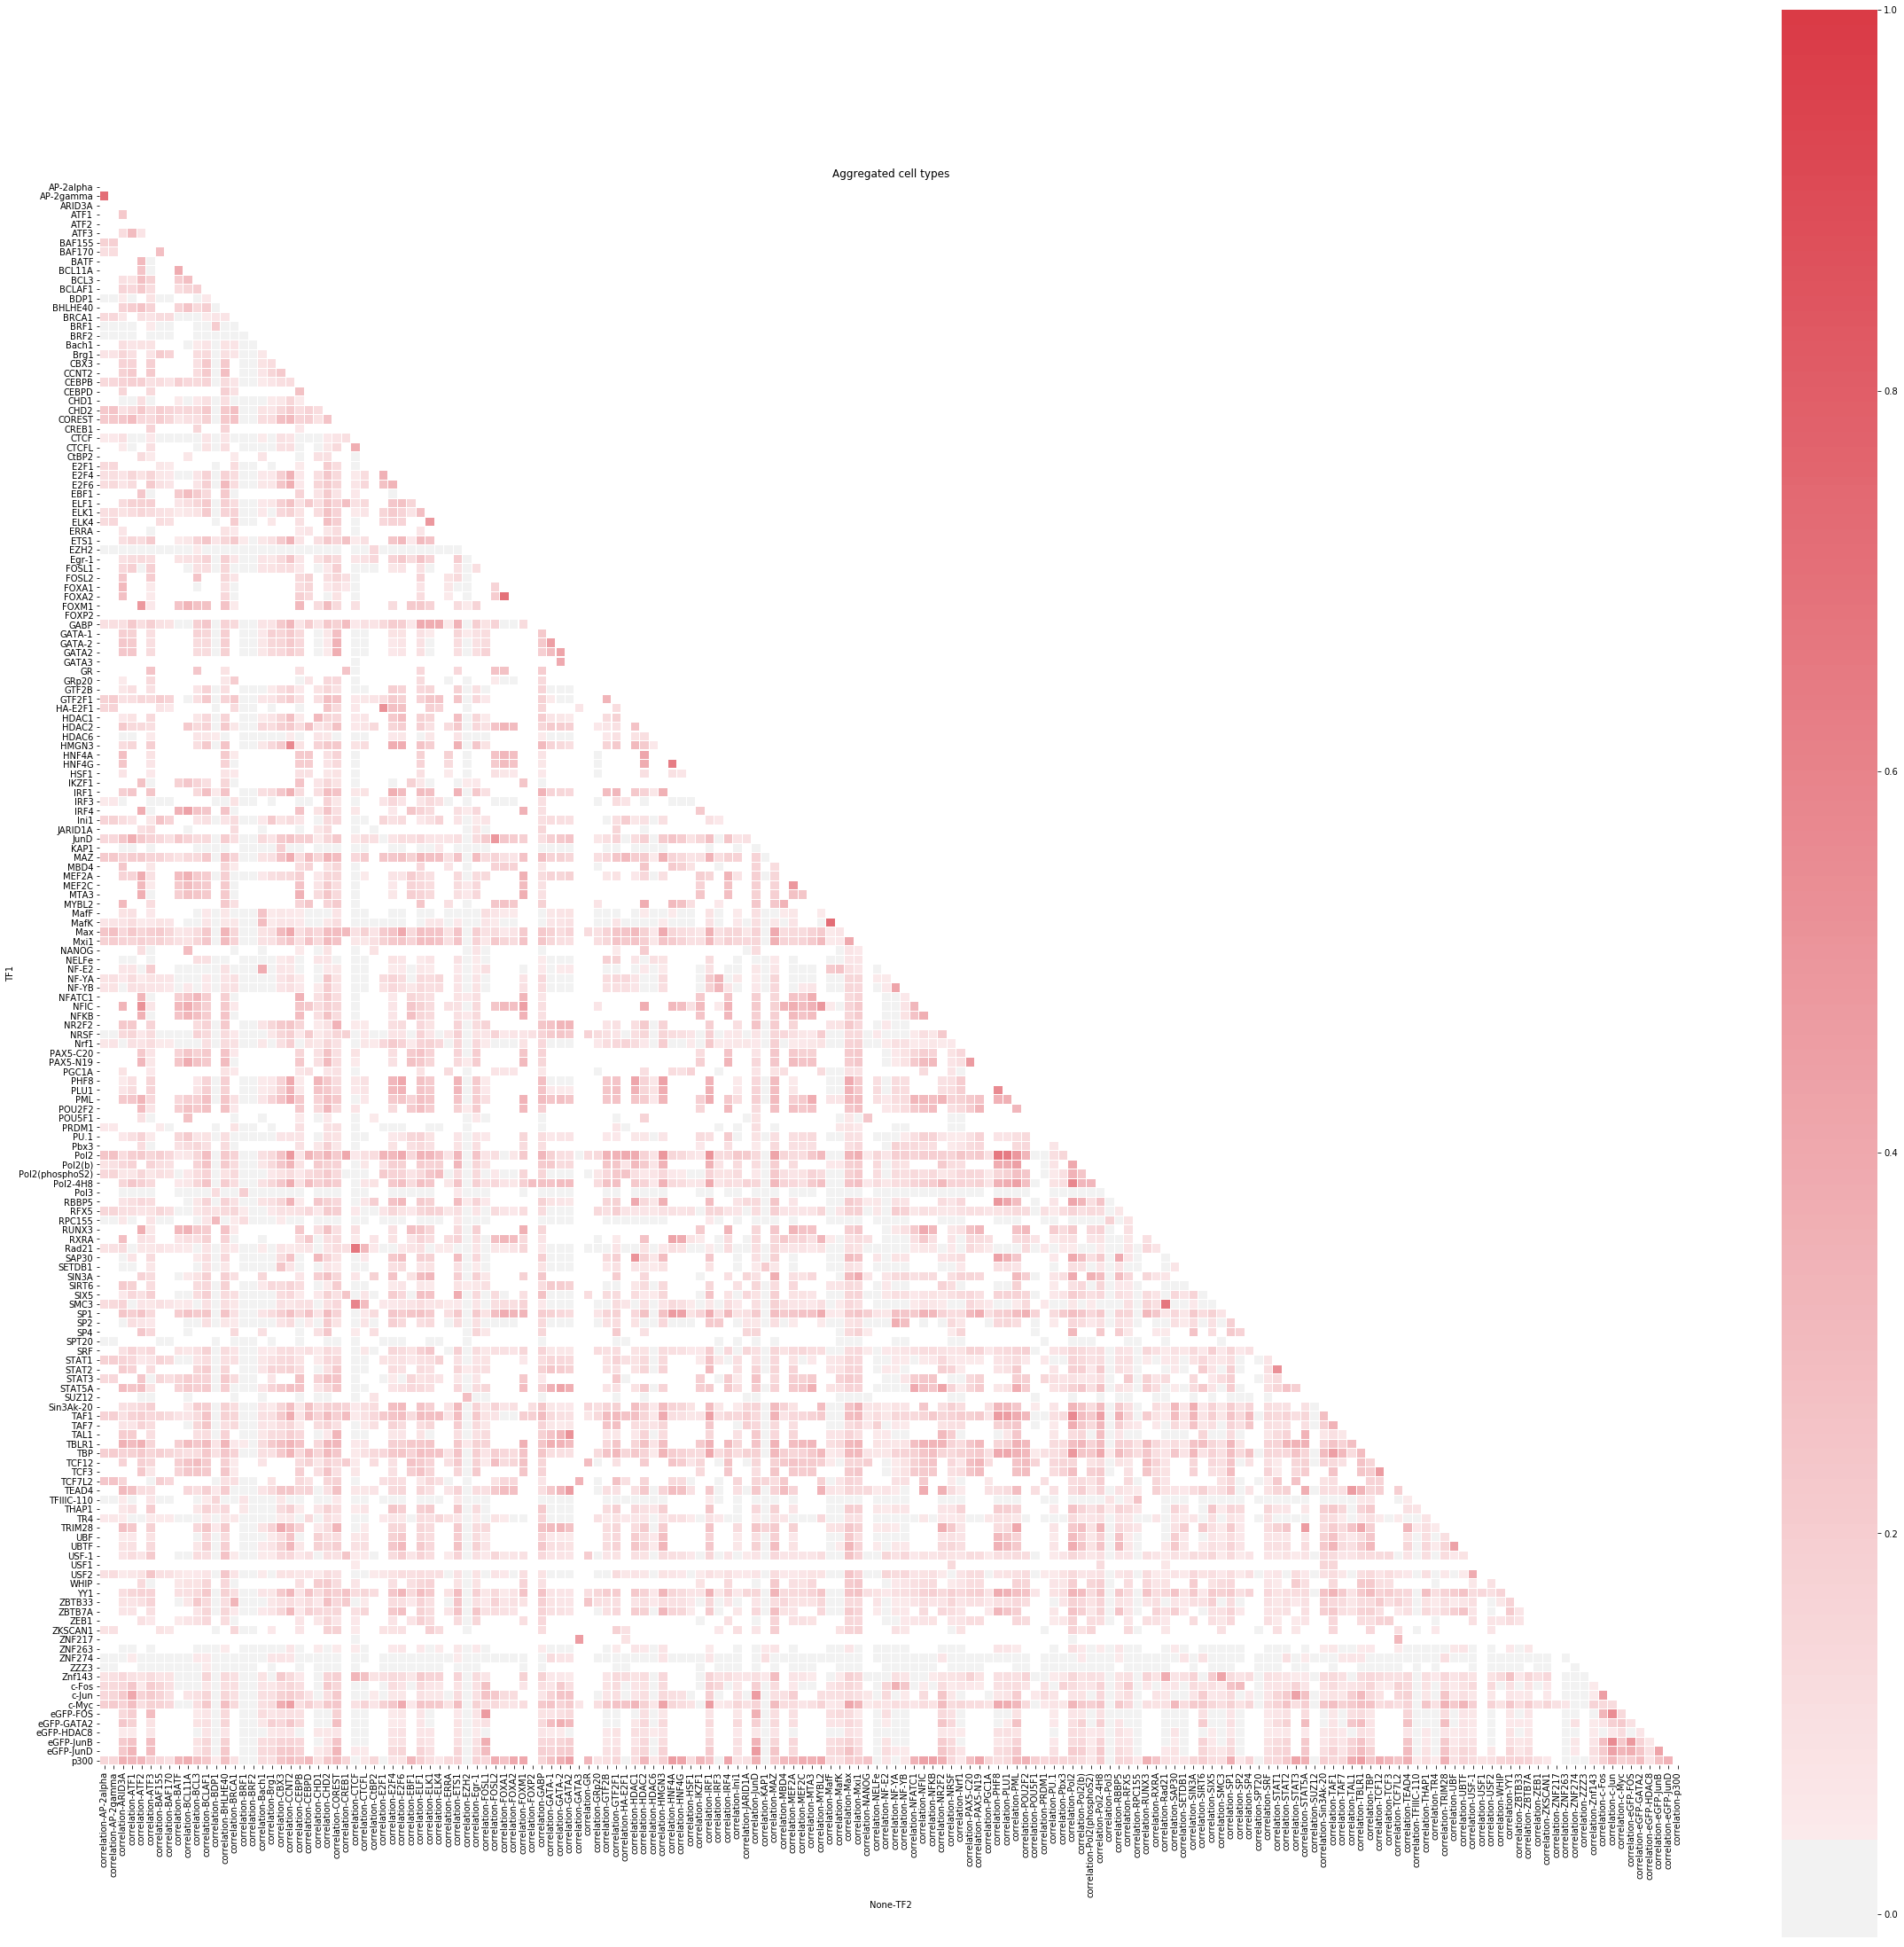

In [24]:
# plot correlation matrix
                         
# Generate a mask for the upper triangle
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 40))

ax.set_title("Aggregated cell types")

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=0.05)



The code below is consistent with binding complexes.

## CTCF Binding complex
CTCF/Rad21
Rad21/SMC3
CTCF/SMC3

AP-2gamma/AP-2alpha



In [68]:
# do these results make sense?
sorted_values = summarized_correlations[summarized_correlations['TF1']!=summarized_correlations['TF2']].sort_values(['correlation'], ascending=[0])

# filter out duplicate correlations
sorted_values["TFs"] = map(lambda x: "".join(sorted([x[0], x[1]])), sorted_values.values)
sorted_values = sorted_values.drop_duplicates(subset=['TFs'])
sorted_values.to_csv('/../../data/correlation_tfs_sorted_filtered.csv')

In [69]:
sorted_values

,TF1,TF2,Sum,Count,correlation,TFs
0,AP-2gamma,AP-2alpha,0.724060,1,0.72406,AP-2alphaAP-2gamma
0,MafK,MafF,1.447775,2,0.723887,MafFMafK
0,FOXA2,FOXA1,0.702543,1,0.702543,FOXA1FOXA2
0,CTCF,Rad21,6.005739,9,0.667304,CTCFRad21
0,Rad21,SMC3,2.655610,4,0.663903,Rad21SMC3
0,PHF8,Pol2,0.657834,1,0.657834,PHF8Pol2
0,Pol2,PLU1,0.643550,1,0.64355,PLU1Pol2
0,HNF4G,HNF4A,0.633162,1,0.633162,HNF4AHNF4G
0,CTCF,SMC3,2.342240,4,0.58556,CTCFSMC3
0,Pol2,Pol2-4H8,4.662136,8,0.582767,Pol2Pol2-4H8


# Loading Genomic Positions

In [55]:
# load genomic positions

# train.mat: line 1-2200000
# valid.mat: line 2200001-2204000
# test.mat: lines corresponding to chr8 and chr9

col_names=["chr", "start", "end", "strand", "score", "any"]
positions = pd.read_csv('../../data/allTFs.pos.tsv', sep='\t', names = col_names)

In [18]:
# divy up genomic positions
train_positions = positions.head(2200000)
test_positions = positions[2200001:2204000]
valid_positions = positions[(positions['chr'] == 'chr8') | (positions['chr'] == 'chr9')]

In [20]:
valid_positions.count()


chr       227512
start     227512
end       227512
strand    227512
score     227512
any       227512
dtype: int64